<a href="https://colab.research.google.com/github/vngirmek/stc510/blob/main/Mod3_Project_Essential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3 Essentials

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
crime_d = pd.read_excel('crimestat.xls')

In [ ]:
unemp_d = pd.read_excel('unempstat.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
crime_d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   INC NUMBER          65535 non-null  object        
 1   OCCURRED ON         65335 non-null  datetime64[ns]
 2   OCCURRED TO         46733 non-null  datetime64[ns]
 3   UCR CRIME CATEGORY  65535 non-null  object        
 4   100 BLOCK ADDR      65535 non-null  object        
 5   ZIP                 65534 non-null  float64       
 6   PREMISE TYPE        65068 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 3.5+ MB


In [ ]:
#Changing the OCCURRED ON column to date time in order to get the year from it
crime_d['OCCURRED ON'] = pd.to_datetime(crime_d['OCCURRED ON'])

In [ ]:
crime_d['year'] = crime_d['OCCURRED ON'].dt.year

In [ ]:
crime_d['year'].unique()

array([2015.,   nan, 2016.])

In [ ]:
#Grouping crime data by 'year', 'ZIP', and 'UCR CRIME CATEGORY' and count of crimes in each group
crime_d_grouped = crime_d.groupby(['year', 'ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='count')



In [ ]:
crime_d_grouped

,year,ZIP,UCR CRIME CATEGORY,count
0,2015.0,85003.0,AGGRAVATED ASSAULT,6
1,2015.0,85003.0,BURGLARY,25
2,2015.0,85003.0,DRUG OFFENSE,9
3,2015.0,85003.0,LARCENY-THEFT,79
4,2015.0,85003.0,MOTOR VEHICLE THEFT,7
...,...,...,...,...
861,2016.0,85383.0,BURGLARY,1
862,2016.0,85392.0,AGGRAVATED ASSAULT,1
863,2016.0,85392.0,DRUG OFFENSE,2
864,2016.0,85395.0,AGGRAVATED ASSAULT,1


In [ ]:
#crime count data in yearly
crime_d_yearly = crime_d_grouped.groupby('year')['count'].sum()

In [ ]:
crime_d_yearly

year
2015.0    10124
2016.0    55210
Name: count, dtype: int64

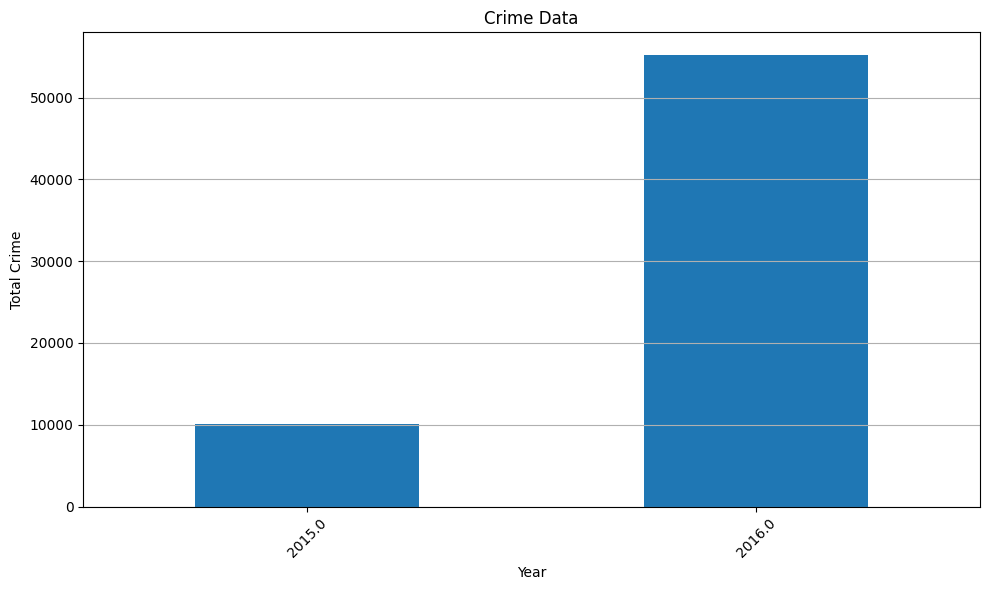

In [ ]:
# Plot in a bar chart
plt.figure(figsize=(10, 6))
crime_d_yearly.plot(kind='bar')
plt.title('Crime Data')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

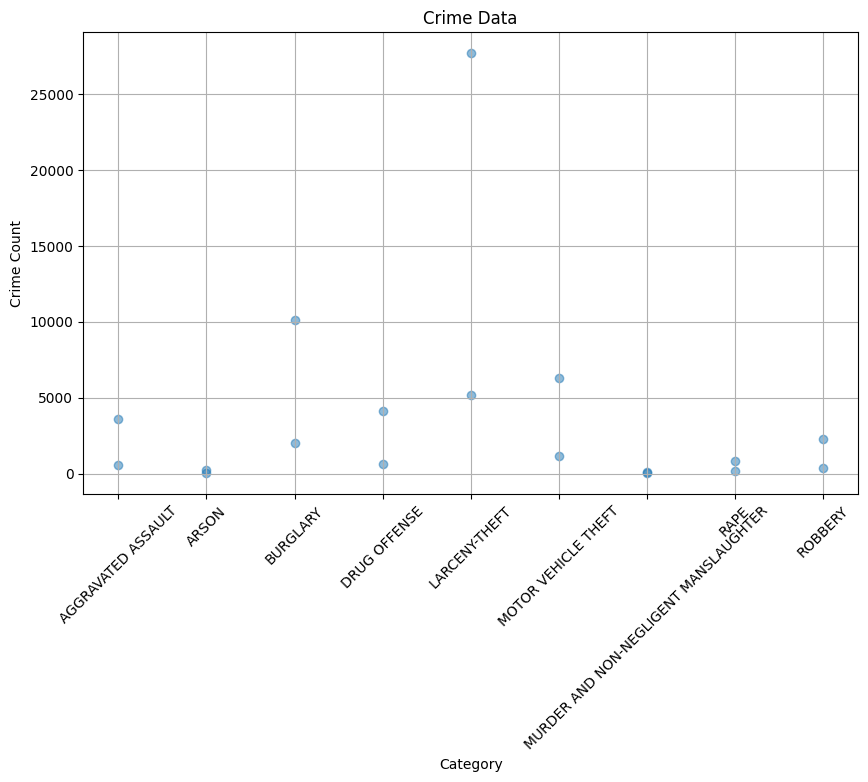

In [ ]:
# data for the scatter plot
x = crime_d_grouped['UCR CRIME CATEGORY']
y = crime_d_grouped['count']

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Crime Data')
plt.xlabel('Category')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#check the column names of the Dataframes
unemp_d.columns


Index(['Local Area Unemployment Statistics', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [ ]:
unemp_d = pd.read_excel('unempstat.xlsx', header=0)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
#assigning the column names
unemp_d.columns = ['year', 'period', 'labor force', 'employment', 'unemployment', 'unemployment rate']

In [ ]:
unemp_d.columns

Index(['year', 'period', 'labor force', 'employment', 'unemployment',
       'unemployment rate'],
      dtype='object')

In [ ]:
#Grouping the unemployment data by 'year' and compute the mean unemployment rate for each year
unemp_d_grouped = unemp_d.groupby(['year', 'unemployment rate']).mean().reset_index()


<ipython-input-82-92442dbddc7e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unemp_d_grouped = unemp_d.groupby(['year', 'unemployment rate']).mean().reset_index()


In [ ]:
unemp_d_grouped

,year,unemployment rate
0,2015,4.8
1,2015,4.9
2,2015,5
3,2015,5.1
4,2015,5.2
5,2015,5.3
6,2015,5.5
7,2015,5.6
8,2015,5.7
9,2016,4.3


ValueError: could not convert string to float: 'Year'

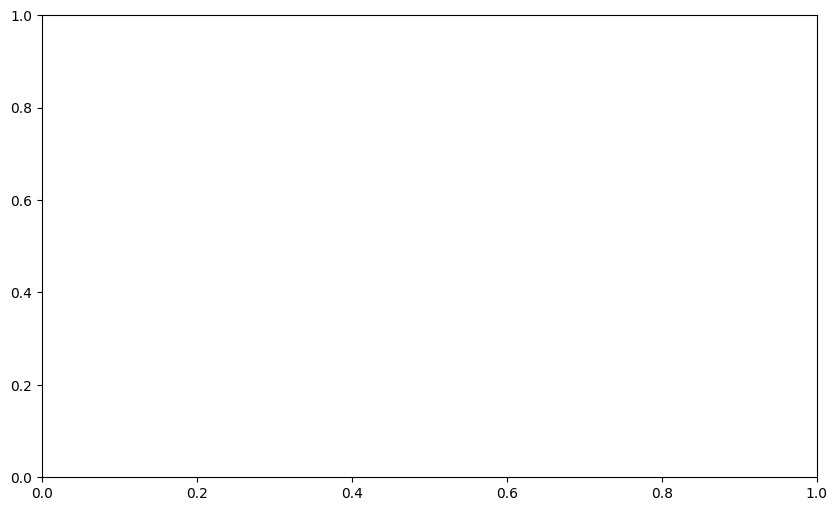

In [ ]:
# Getting data for the scatter plot
x = unemp_d_grouped['year']
y = unemp_d_grouped['unemployment rate']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Unemployment Data')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [125]:
# storing results to CSV format and save it to a file
unemp_d_grouped.to_csv('unemployment_data.csv', index=False)
crime_d_grouped.to_csv('crime_data.csv', index=False)
